# RQ1 Analysis (feasability and scalability)

## Filtering out invalid models

In [1]:
import re
import pandas as pd

# Extract model names from the log file
with open('../results/RQ1/invalid_models_log.txt', "r", encoding="utf-8") as f:
    log_content = f.read()

model_names_to_remove = re.findall(r"error loading model:\s+(.+?)\s+with", log_content)

df = pd.read_csv("../results/RQ1/models.csv")

# Filter out rows where 'model' is in the list of models to remove
filtered_df = df[~df['model'].isin(model_names_to_remove)]
filtered_df.to_csv("../results/RQ1/valid_models.csv", index=False)

print(f"Removed {len(df) - len(filtered_df)} rows. Saved to 'valid_models.csv'.")


Removed 319 rows. Saved to 'valid_models.csv'.


## Plotting model's data

In [2]:
import pandas as pd

df = pd.read_csv('../results/RQ1/valid_models.csv')
df.head()


,model,LOC,classes,attributes,refs,containments
0,.skriven,47,6,8,2,0
1,101companies,37,3,7,0,4
2,abapobj,220,13,47,7,13
3,ABase,23,5,4,0,0
4,ABC,18,3,0,0,0


C:\Users\lamp6\AppData\Local\Temp\ipykernel_21888\414040823.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(


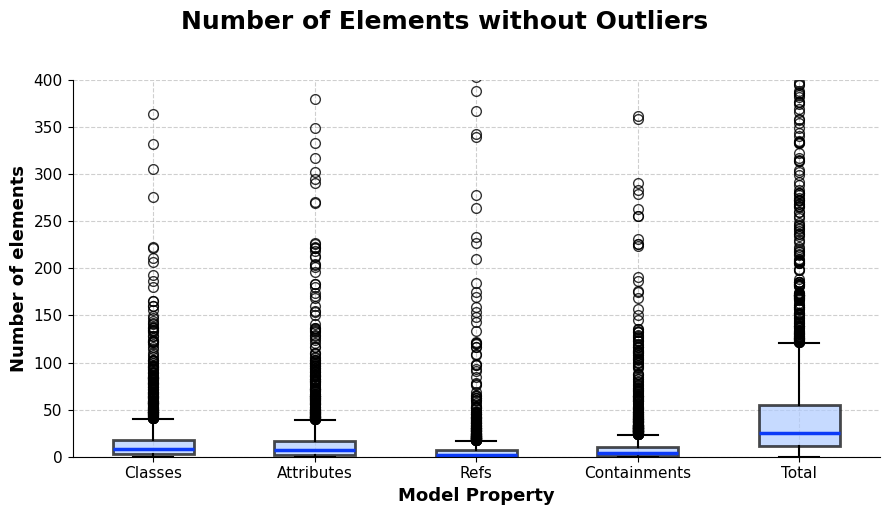

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

valid_df = pd.read_csv('../results/RQ1/valid_models.csv')
props = ['classes', 'attributes', 'refs', 'containments']

valid_df['total'] = valid_df[props].sum(axis=1)
data = [valid_df[prop].values for prop in props] + [valid_df['total'].values]

fig, ax = plt.subplots(figsize=(9, 5))
fig.suptitle('Number of Elements without Outliers', fontsize=18, fontweight='bold', y=1.02)

box = ax.boxplot(
    data,
    vert=True,
    patch_artist=True,
    labels=[p.capitalize() for p in props] + ['Total'],
    boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
    medianprops=dict(color="#0B3AF7", linewidth=2.5),
    whiskerprops=dict(color='black', linewidth=1.5),
    capprops=dict(color='black', linewidth=1.5),
    flierprops=dict(marker='o', color='red', alpha=0.8, markersize=7),   
)

ax.set_xlabel('Model Property', fontsize=13, fontweight='bold')
ax.set_ylabel('Number of elements', fontsize=13, fontweight='bold')
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)
ax.grid(True, linestyle='--', alpha=0.6)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

ax.set_ylim(0, 400)  

plt.tight_layout()
plt.show()

C:\Users\lamp6\AppData\Local\Temp\ipykernel_21888\307432290.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(


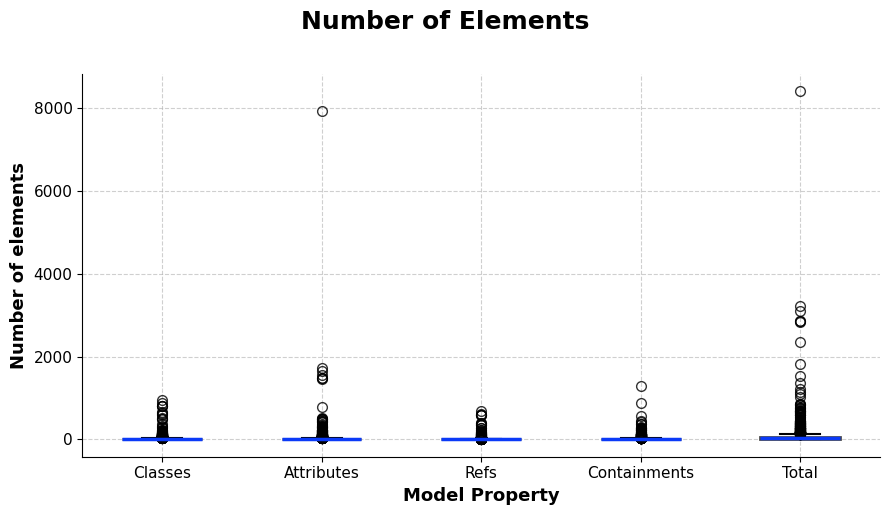

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

valid_df = pd.read_csv('../results/RQ1/valid_models.csv')
props = ['classes', 'attributes', 'refs', 'containments']

valid_df['total'] = valid_df[props].sum(axis=1)
data = [valid_df[prop].values for prop in props] + [valid_df['total'].values]

fig, ax = plt.subplots(figsize=(9, 5))
fig.suptitle('Number of Elements', fontsize=18, fontweight='bold', y=1.02)

box = ax.boxplot(
    data,
    vert=True,
    patch_artist=True,
    labels=[p.capitalize() for p in props] + ['Total'],
    boxprops=dict(facecolor='#AFCBFF', color='black', linewidth=2, alpha=0.7),
    medianprops=dict(color="#0B3AF7", linewidth=2.5),
    whiskerprops=dict(color='black', linewidth=1.5),
    capprops=dict(color='black', linewidth=1.5),
    flierprops=dict(marker='o', color='red', alpha=0.8, markersize=7),   
)

ax.set_xlabel('Model Property', fontsize=13, fontweight='bold')
ax.set_ylabel('Number of elements', fontsize=13, fontweight='bold')
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)
ax.grid(True, linestyle='--', alpha=0.6)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)


plt.tight_layout()
plt.show()

# Results

## Summary

In [5]:
import pandas as pd 
import glob

# Load valid models
valid_df = pd.read_csv('../results/RQ1/valid_models.csv')

# Find all models_run_*.csv files
run_files = glob.glob('../results/RQ1/models_run_*.csv')

dfs = []
for f in run_files:
    df = pd.read_csv(f)
    dfs.append(df)

# Combine all run files into a single DataFrame
runs_df = pd.concat([pd.read_csv(f) for f in run_files], ignore_index=True)

# Merge with valid_df on 'model' column (inner join keeps only valid models)
combined_df = pd.merge(runs_df, valid_df, on='model', suffixes=('_run', '_model'))

# Now combined_df contains all run results with their corresponding valid model properties
combined_df.head()

,model,nodes,edges,time,mem,LOC,classes,attributes,refs,containments
0,CSS,47,46,3358,16699,88,13,18,0,15
1,WrspmDomainmodel,10,14,257,950,20,5,2,1,1
2,experiment,5,4,284,965,16,1,1,2,0
3,modembed,203,352,639,1671,388,0,0,0,0
4,xmof,245,431,348,2149,1014,0,0,0,0


In [6]:
import pandas as pd
import glob


all_times = []
all_mem = []
for file in run_files:
    df = pd.read_csv(file)
    all_times.extend(df['time'].values)
    all_mem.extend(df['mem'].values)

all_times = pd.Series(all_times)
print(f"Number of runs analyzed: {len(run_files)}")
print(f"Min time: {all_times.min():.2f} ms")
print(f"Max time: {all_times.max():.2f} ms")
print(f"Avg time: {all_times.mean():.2f} ms")

all_mem = pd.Series(all_mem) 
print(f"Min memory: {all_mem.min():.2f} KB")
print(f"Max memory: {all_mem.max():.2f} KB")
print(f"Avg memory: {all_mem.mean():.2f} KB")

Number of runs analyzed: 30
Min time: 7.00 ms
Max time: 3358.00 ms
Avg time: 31.67 ms
Min memory: 151.00 KB
Max memory: 46146.00 KB
Avg memory: 836.55 KB


In [7]:
import pandas as pd  

dfs = [pd.read_csv(f) for f in run_files]
all_runs = pd.concat(dfs, ignore_index=True)

# Group by 'model' and compute the mean for each metric
avg_df = all_runs.groupby('model', as_index=False).mean(numeric_only=True)

# Get the top 10 models sorted by descending average time
avg_df = avg_df.sort_values('time', ascending=False)

avg_df.head(10)

,model,nodes,edges,time,mem
1355,format,9514.0,12936.0,1536.300000,42897.866667
391,IFC2X4_RC3,5117.0,7391.0,762.700000,20016.066667
107,CIM15,4378.0,7728.0,724.166667,17624.566667
1452,ifc2x3,4487.0,6350.0,678.800000,15604.833333
1453,ifc2x3tc1,4497.0,6369.0,648.333333,8775.333333
976,acad,69.0,68.0,561.900000,621.633333
1849,scheduler,99.0,97.0,557.700000,613.900000
106,CIM14,3292.0,5294.0,553.866667,11395.466667
390,IFC2X3_TC1,3352.0,5223.0,553.000000,8568.466667
1960,telehash,32.0,33.0,490.233333,380.533333


## Considering Time (ms)

C:\Users\lamp6\AppData\Local\Temp\ipykernel_21888\2430443355.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  blues = cm.get_cmap('Blues', num_runs + 2)


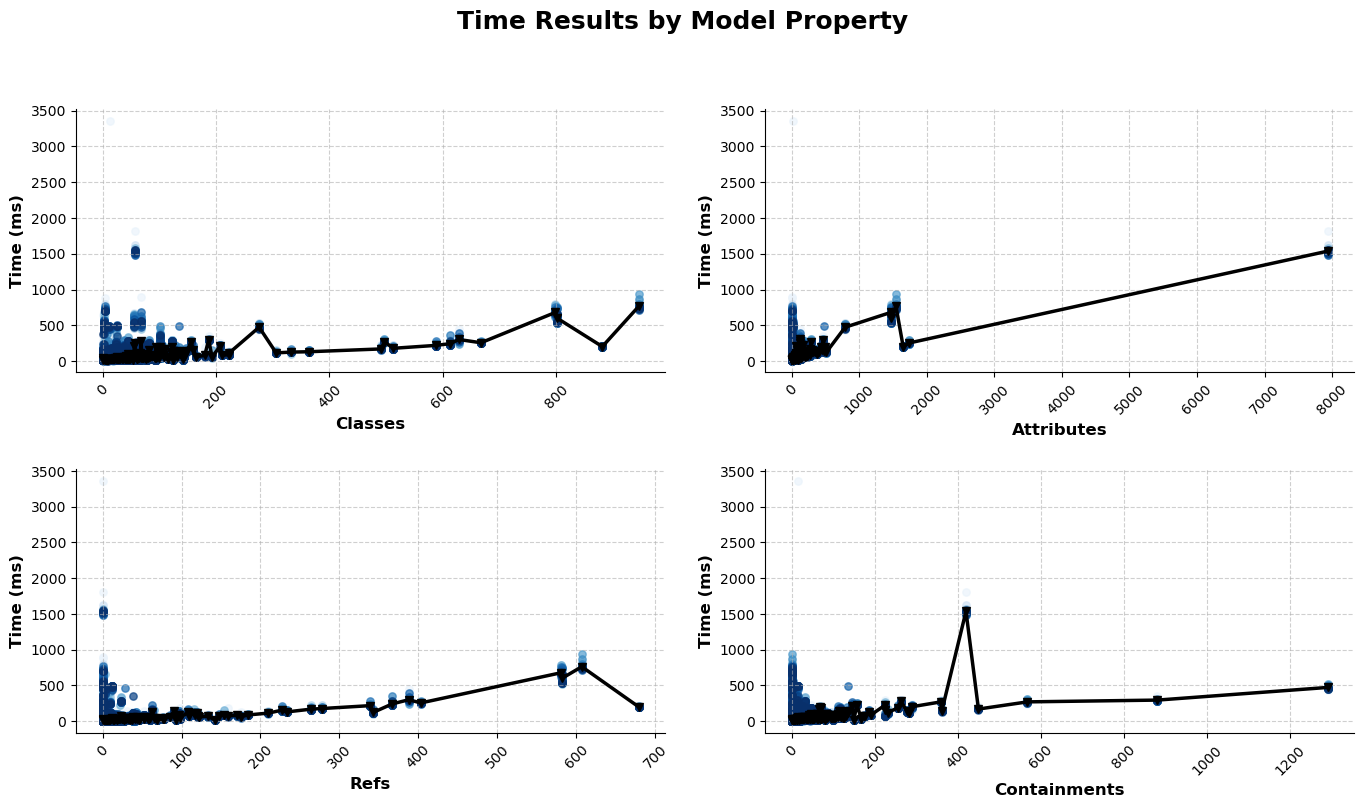

In [19]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

num_runs = len(dfs)
blues = cm.get_cmap('Blues', num_runs + 2)
colors = [blues(i + 2) for i in range(num_runs)]

props = ['classes', 'attributes', 'refs', 'containments']
#markers = ['o', 's', '^', 'D', 'P', 'X', '*', 'v']

# Run index to combined_df for coloring
for i, df in enumerate(dfs):
    df['run'] = i
runs_df = pd.concat(dfs, ignore_index=True)
combined_df = pd.merge(runs_df, valid_df, on='model', suffixes=('_run', '_model'))

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle('Time Results by Model Property', fontsize=18, fontweight='bold', y=1.02)

for idx, prop in enumerate(props):
    avg_times = combined_df.groupby(prop)['time'].mean()
    ax = axes[idx // 2, idx % 2]
    ax.plot(avg_times.index, avg_times.values, color="#000000", linewidth=2.5, label='Average', marker='v')
    for i in range(num_runs):
        run_df = combined_df[combined_df['run'] == i]
        #marker_style = markers[i % len(markers)]
        ax.scatter(run_df[prop], run_df['time'], label=f'Run {i+1}', alpha=0.7, s=28,  color=colors[i])
    ax.set_xlabel(prop.capitalize(), fontsize=12, fontweight='bold')
    ax.set_ylabel('Time (ms)', fontsize=12, fontweight='bold')
    ax.tick_params(axis='x', labelsize=10, rotation=45)
    ax.tick_params(axis='y', labelsize=10)
    ax.grid(True, linestyle='--', alpha=0.6)
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    #if idx == 0:
    #    ax.legend(fontsize=10, loc='best')
    # ax.set_xlim(0, 2000)  
plt.tight_layout(pad=2)
plt.show()

C:\Users\lamp6\AppData\Local\Temp\ipykernel_21888\1771096284.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(


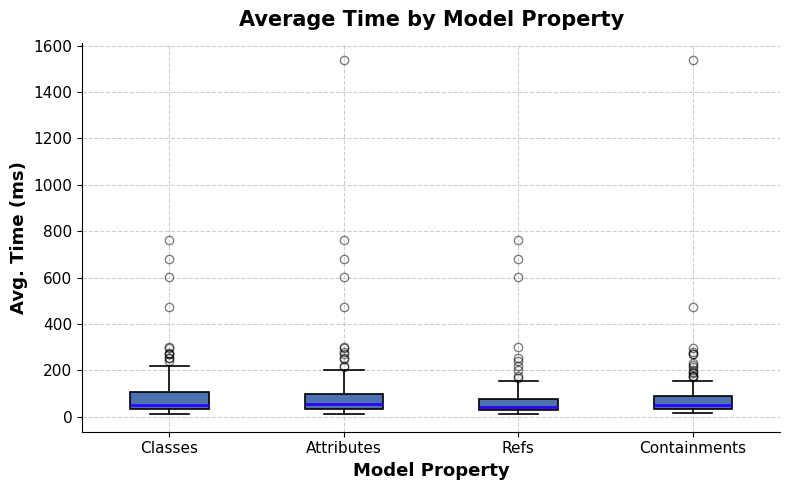

In [9]:
import matplotlib.pyplot as plt 

props = ['classes', 'attributes', 'refs', 'containments']
avg_time_data = [combined_df.groupby(prop)['time'].mean().values for prop in props]

fig, ax = plt.subplots(figsize=(8, 5))

box = ax.boxplot(
    avg_time_data,
    vert=True,
    patch_artist=True,
    labels=[p.capitalize() for p in props],
    boxprops=dict(facecolor='#4C72B0', color='black', linewidth=1.2),
    medianprops=dict(color="#2F00FF", linewidth=2),
    whiskerprops=dict(color='black', linewidth=1.2),
    capprops=dict(color='black', linewidth=1.2),
    flierprops=dict(marker='o', color='gray', alpha=0.5)
)

ax.set_xlabel('Model Property', fontsize=13, fontweight='bold')
ax.set_ylabel('Avg. Time (ms)', fontsize=13, fontweight='bold')
ax.set_title('Average Time by Model Property', fontsize=15, fontweight='bold', pad=12)
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)
ax.grid(True, linestyle='--', alpha=0.6)

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

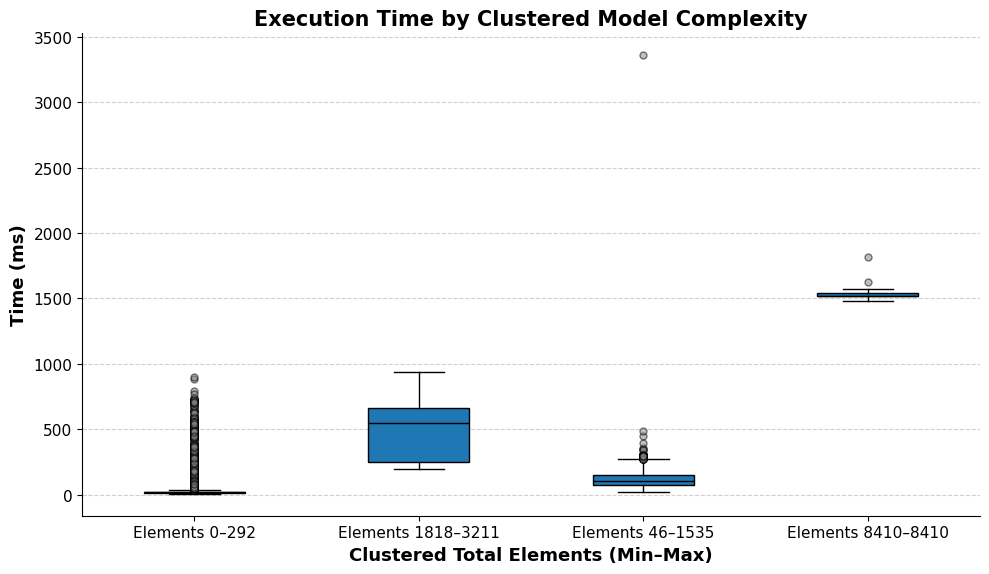

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans 
 
valid_df['total_structural'] = valid_df[['classes', 'attributes', 'refs', 'containments']].sum(axis=1)
model_total_structural = valid_df.set_index('model')['total_structural'] 
for df in dfs:
    df['total_structural'] = df['model'].map(model_total_structural) 
combined_df_total = pd.concat(dfs)
combined_df_total = combined_df_total.dropna(subset=['total_structural', 'time']) 
X = combined_df_total[['total_structural', 'time']].values 
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
combined_df_total['cluster'] = kmeans.fit_predict(X) 
cluster_stats = combined_df_total.groupby('cluster').agg(
    min_struct=('total_structural', 'min'),
    max_struct=('total_structural', 'max'),
    mean_struct=('total_structural', 'mean')
).reset_index()
cluster_stats = cluster_stats.sort_values(by='mean_struct').reset_index(drop=True) 
cluster_stats['cluster_label'] = cluster_stats.apply(
    lambda row: f"Elements {int(row['min_struct'])}–{int(row['max_struct'])}", axis=1
) 
cluster_id_to_label = dict(zip(cluster_stats['cluster'], cluster_stats['cluster_label'])) 
combined_df_total['cluster_label'] = combined_df_total['cluster'].map(cluster_id_to_label) 
fig, ax = plt.subplots(figsize=(10, 6)) 
combined_df_total.boxplot(
    column='time',
    by='cluster_label',
    ax=ax,
    grid=False,
    patch_artist=True,
    boxprops=dict(facecolor=cm.tab10(0), color='black'),
    medianprops=dict(color='black'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    flierprops=dict(marker='o', markersize=5, markerfacecolor='gray', alpha=0.5)
)
ax.set_title('Execution Time by Clustered Model Complexity', fontsize=15, fontweight='bold')
ax.set_xlabel('Clustered Total Elements (Min–Max)', fontsize=13, fontweight='bold')
ax.set_ylabel('Time (ms)', fontsize=13, fontweight='bold')
plt.suptitle('')   
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)
ax.tick_params(axis='x', labelrotation=0) 
ax.grid(True, linestyle='--', axis='y', alpha=0.6)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

C:\Users\lamp6\AppData\Local\Temp\ipykernel_21888\807311242.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  blues = cm.get_cmap('Blues', num_runs + 2)


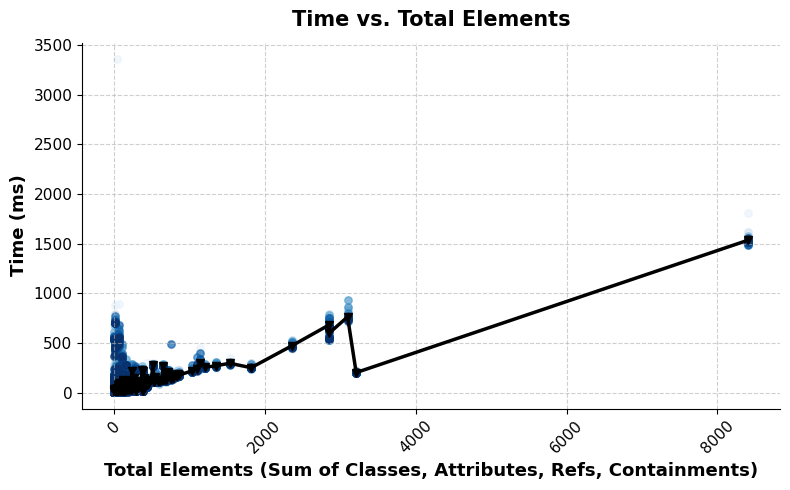

In [23]:
import matplotlib.pyplot as plt 
import matplotlib.cm as cm

num_runs = len(dfs)
blues = cm.get_cmap('Blues', num_runs + 2)
colors = [blues(i + 2) for i in range(num_runs)]

valid_df['total_structural'] = valid_df[['classes', 'attributes', 'refs', 'containments']].sum(axis=1)
model_total_structural = valid_df.set_index('model')['total_structural'] 
for df in dfs:
    df['total_structural'] = df['model'].map(model_total_structural) 
combined_df_total = pd.concat(dfs)
 
avg_times = combined_df_total.groupby('total_structural')['time'].mean()
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(avg_times.index, avg_times.values, color="#000000", linewidth=2.5, label='Average', marker='v')

#markers = ['o', 's', '^', 'D', 'P', 'X', '*', 'v']
for i, df in enumerate(dfs):
    #marker_style = markers[i % len(markers)]
    ax.scatter(df['total_structural'], df['time'], label=f'Run {i+1}', alpha=0.7, s=28,  color=colors[i])
ax.set_xlabel('Total Elements (Sum of Classes, Attributes, Refs, Containments)', fontsize=13, fontweight='bold')
ax.set_ylabel('Time (ms)', fontsize=13, fontweight='bold')
ax.set_title('Time vs. Total Elements', fontsize=15, fontweight='bold', pad=12)
ax.tick_params(axis='x', labelsize=11, rotation=45)
ax.tick_params(axis='y', labelsize=11)
ax.grid(True, linestyle='--', alpha=0.6)
#ax.legend(fontsize=10, loc='best')

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# ax.set_xlim(0, 3300) 
plt.tight_layout()
plt.show()

## Considering memory (KB)

C:\Users\lamp6\AppData\Local\Temp\ipykernel_21888\3467252005.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  blues = cm.get_cmap('Blues', num_runs + 2)


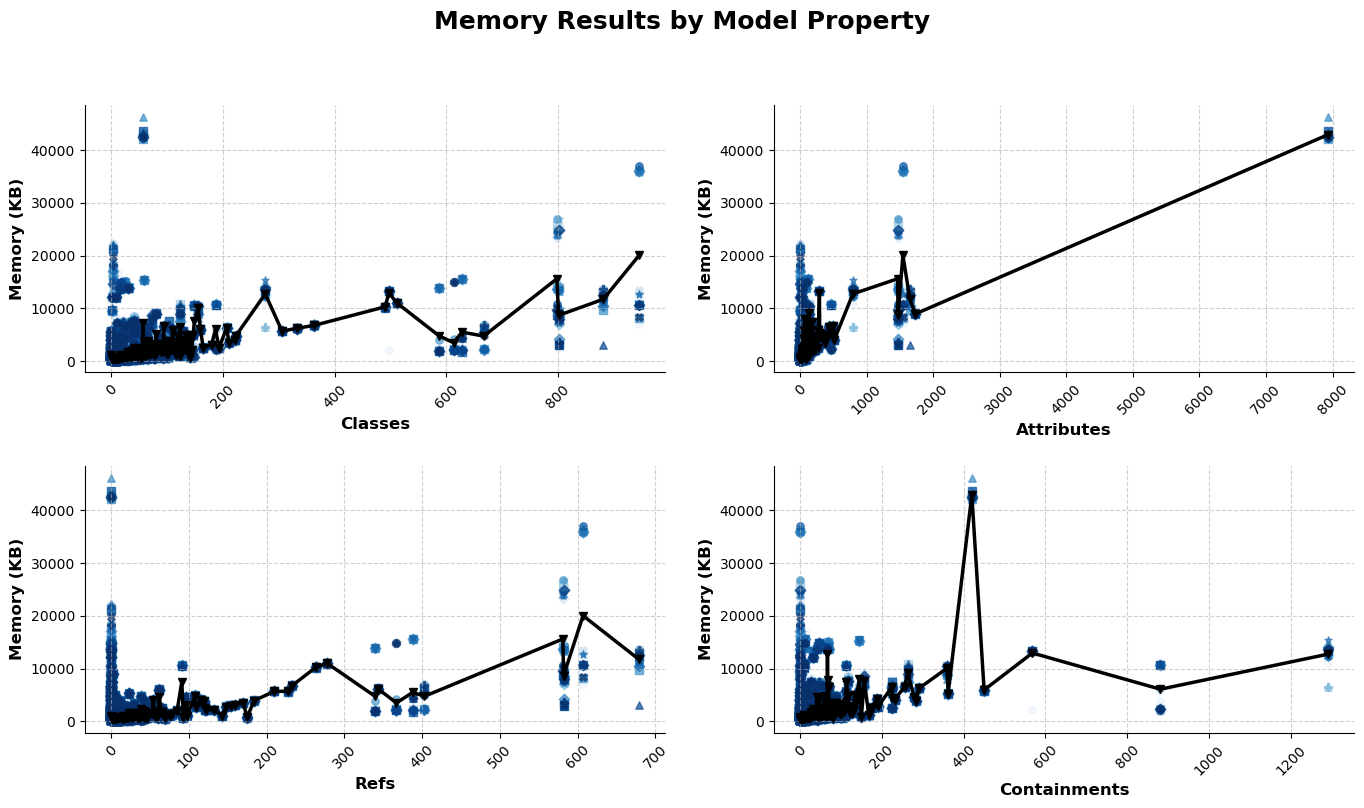

In [24]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

num_runs = len(dfs)
blues = cm.get_cmap('Blues', num_runs + 2)
colors = [blues(i + 2) for i in range(num_runs)]

props = ['classes', 'attributes', 'refs', 'containments']
markers = ['o', 's', '^', 'D', 'P', 'X', '*', 'v']

# Run index to combined_df for coloring
for i, df in enumerate(dfs):
    df['run'] = i
runs_df = pd.concat(dfs, ignore_index=True)
combined_df = pd.merge(runs_df, valid_df, on='model', suffixes=('_run', '_model'))

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle('Memory Results by Model Property', fontsize=18, fontweight='bold', y=1.02)

for idx, prop in enumerate(props):
    avg_mem = combined_df.groupby(prop)['mem'].mean()
    ax = axes[idx // 2, idx % 2]
    ax.plot(avg_mem.index, avg_mem.values, color="#000000", linewidth=2.5, label='Average', marker='v')
    for i in range(num_runs):
        run_df = combined_df[combined_df['run'] == i]
        marker_style = markers[i % len(markers)]
        ax.scatter(run_df[prop], run_df['mem'], label=f'Run {i+1}', alpha=0.7, s=28, marker=marker_style, color=colors[i])
    ax.set_xlabel(prop.capitalize(), fontsize=12, fontweight='bold')
    ax.set_ylabel('Memory (KB)', fontsize=12, fontweight='bold')
    ax.tick_params(axis='x', labelsize=10, rotation=45)
    ax.tick_params(axis='y', labelsize=10)
    ax.grid(True, linestyle='--', alpha=0.6)
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    #if idx == 0:
     #   ax.legend(fontsize=10, loc='best')

plt.tight_layout(pad=2)
plt.show()

C:\Users\lamp6\AppData\Local\Temp\ipykernel_21888\1527332675.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(


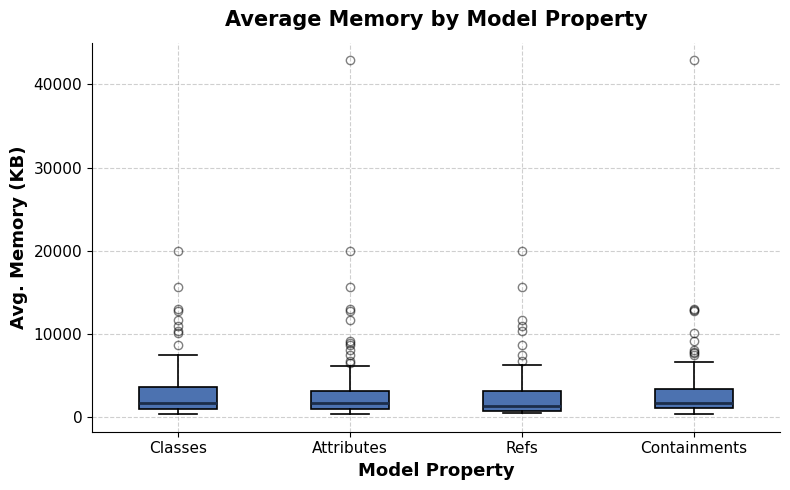

In [13]:
import matplotlib.pyplot as plt 

props = ['classes', 'attributes', 'refs', 'containments']
avg_mem_data = [combined_df.groupby(prop)['mem'].mean().values for prop in props]

fig, ax = plt.subplots(figsize=(8, 5))

box = ax.boxplot(
    avg_mem_data,
    vert=True,
    patch_artist=True,
    labels=[p.capitalize() for p in props],
    boxprops=dict(facecolor='#4C72B0', color='black', linewidth=1.2),
    medianprops=dict(color="#1B2D49", linewidth=2),
    whiskerprops=dict(color='black', linewidth=1.2),
    capprops=dict(color='black', linewidth=1.2),
    flierprops=dict(marker='o', color='gray', alpha=0.5)
)

ax.set_xlabel('Model Property', fontsize=13, fontweight='bold')
ax.set_ylabel('Avg. Memory (KB)', fontsize=13, fontweight='bold')
ax.set_title('Average Memory by Model Property', fontsize=15, fontweight='bold', pad=12)
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)
ax.grid(True, linestyle='--', alpha=0.6)

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

C:\Users\lamp6\AppData\Local\Temp\ipykernel_21888\414611818.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  blues = cm.get_cmap('Blues', num_runs + 2)


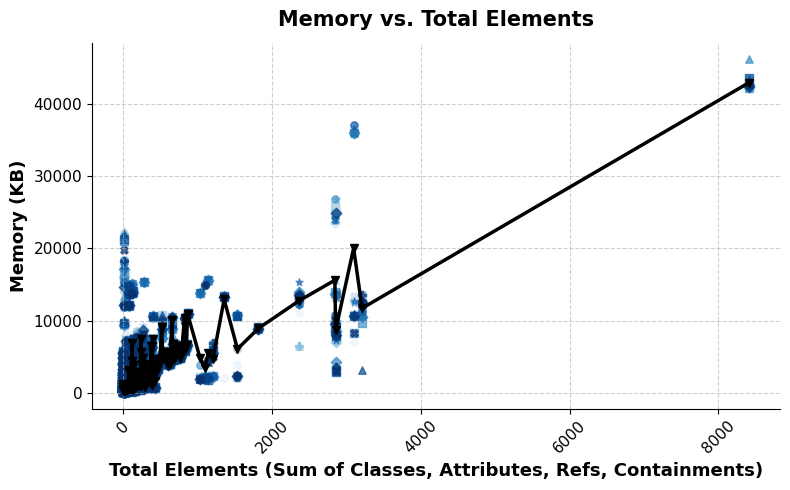

In [25]:
import matplotlib.pyplot as plt 
import matplotlib.cm as cm

num_runs = len(dfs)
blues = cm.get_cmap('Blues', num_runs + 2)
colors = [blues(i + 2) for i in range(num_runs)]

valid_df['total_structural'] = valid_df[['classes', 'attributes', 'refs', 'containments']].sum(axis=1)
model_total_structural = valid_df.set_index('model')['total_structural']


for df in dfs:
    df['total_structural'] = df['model'].map(model_total_structural)


combined_df_total = pd.concat(dfs)  
avg_mems = combined_df_total.groupby('total_structural')['mem'].mean()

fig, ax = plt.subplots(figsize=(8, 5))


ax.plot(avg_mems.index, avg_mems.values, color="#000000", linewidth=2.5, label='Average', marker='v')


markers = ['o', 's', '^', 'D', 'P', 'X', '*', 'v']
for i, df in enumerate(dfs):
    marker_style = markers[i % len(markers)]
    ax.scatter(df['total_structural'], df['mem'], label=f'Run {i+1}', alpha=0.7, s=28, marker=marker_style, color=colors[i])
ax.set_xlabel('Total Elements (Sum of Classes, Attributes, Refs, Containments)', fontsize=13, fontweight='bold')
ax.set_ylabel('Memory (KB)', fontsize=13, fontweight='bold')
ax.set_title('Memory vs. Total Elements', fontsize=15, fontweight='bold', pad=12)
ax.tick_params(axis='x', labelsize=11, rotation=45)
ax.tick_params(axis='y', labelsize=11)
ax.grid(True, linestyle='--', alpha=0.6)
#ax.legend(fontsize=10, loc='best')

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# ax.set_xlim(0, 3300) 
plt.tight_layout()
plt.show()

C:\Users\lamp6\AppData\Local\Temp\ipykernel_21888\724151053.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  blues = cm.get_cmap('Blues', num_runs + 2)


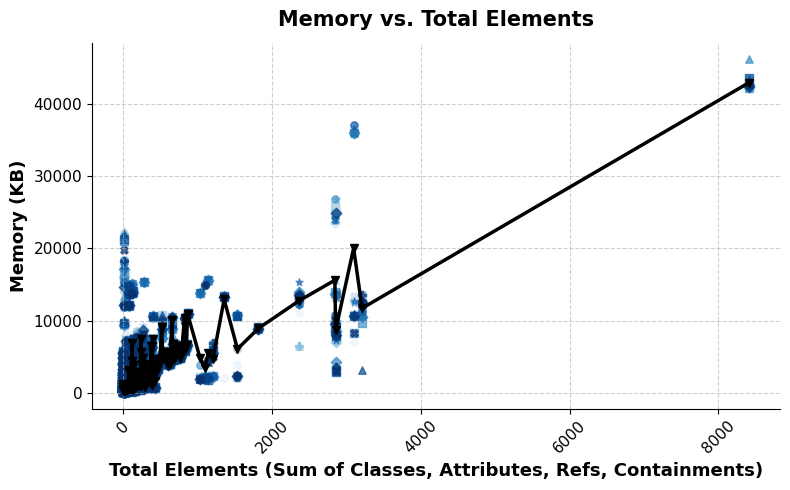

In [26]:
import matplotlib.pyplot as plt 
import matplotlib.cm as cm

num_runs = len(dfs)
blues = cm.get_cmap('Blues', num_runs + 2)
colors = [blues(i + 2) for i in range(num_runs)]

valid_df['total_structural'] = valid_df[['classes', 'attributes', 'refs', 'containments']].sum(axis=1)
model_total_structural = valid_df.set_index('model')['total_structural']


for df in dfs:
    df['total_structural'] = df['model'].map(model_total_structural)


combined_df_total = pd.concat(dfs)  
avg_mems = combined_df_total.groupby('total_structural')['mem'].mean()

fig, ax = plt.subplots(figsize=(8, 5))


ax.plot(avg_mems.index, avg_mems.values, color="#000000", linewidth=2.5, label='Average', marker='v')


markers = ['o', 's', '^', 'D', 'P', 'X', '*', 'v']
for i, df in enumerate(dfs):
    marker_style = markers[i % len(markers)]
    ax.scatter(df['total_structural'], df['mem'], label=f'Run {i+1}', alpha=0.7, s=28, marker=marker_style, color=colors[i])
ax.set_xlabel('Total Elements (Sum of Classes, Attributes, Refs, Containments)', fontsize=13, fontweight='bold')
ax.set_ylabel('Memory (KB)', fontsize=13, fontweight='bold')
ax.set_title('Memory vs. Total Elements', fontsize=15, fontweight='bold', pad=12)
ax.tick_params(axis='x', labelsize=11, rotation=45)
ax.tick_params(axis='y', labelsize=11)
ax.grid(True, linestyle='--', alpha=0.6)
#ax.legend(fontsize=10, loc='best')

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)


# ax.set_xlim(0, 3200) 

plt.tight_layout()
plt.show()

## Considering the size of the graphs (nodes and edges)

C:\Users\lamp6\AppData\Local\Temp\ipykernel_21888\3346257988.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  blues = cm.get_cmap('Blues', num_runs + 2)


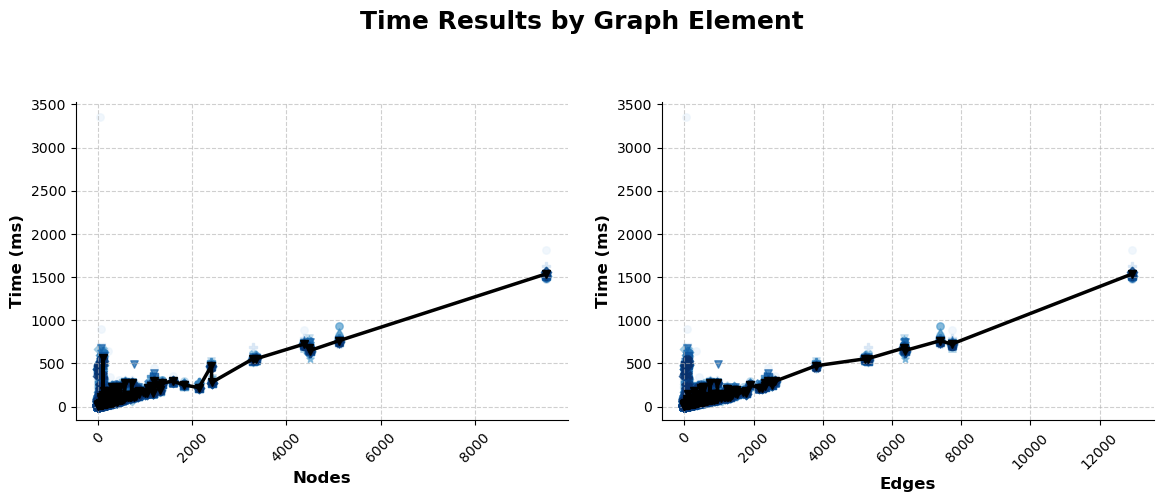

In [27]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

num_runs = len(dfs)
blues = cm.get_cmap('Blues', num_runs + 2)
colors = [blues(i + 2) for i in range(num_runs)]

props = ['nodes', 'edges']
markers = ['o', 's', '^', 'D', 'P', 'X', '*', 'v']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Time Results by Graph Element', fontsize=18, fontweight='bold', y=1.02)

for idx, prop in enumerate(props):
    avg_time = combined_df.groupby(prop)['time'].mean()
    ax = axes[idx]
    # Plot average line
    ax.plot(avg_time.index, avg_time.values, color="#000000", linewidth=2.5, label='Average', marker='v')
    # Plot each run with a different marker
    for i, df in enumerate(dfs):
        marker_style = markers[i % len(markers)]
        ax.scatter(df[prop], df['time'], label=f'Run {i+1}', alpha=0.7, s=28, marker=marker_style, color=colors[i])
    ax.set_xlabel(prop.capitalize(), fontsize=12, fontweight='bold')
    ax.set_ylabel('Time (ms)', fontsize=12, fontweight='bold')
    ax.tick_params(axis='x', labelsize=10, rotation=45)
    ax.tick_params(axis='y', labelsize=10)
    ax.grid(True, linestyle='--', alpha=0.6)
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
   # if idx == 0:
       # ax.legend(fontsize=10, loc='best')

plt.tight_layout(pad=2)
plt.show()

C:\Users\lamp6\AppData\Local\Temp\ipykernel_21888\1137335183.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  blues = cm.get_cmap('Blues', num_runs + 2)


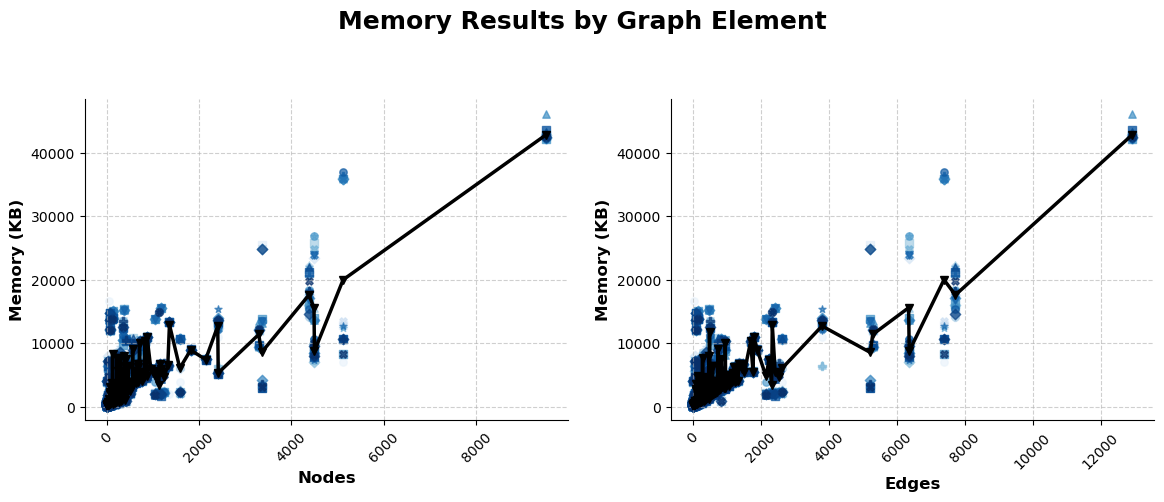

In [28]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

num_runs = len(dfs)
blues = cm.get_cmap('Blues', num_runs + 2)
colors = [blues(i + 2) for i in range(num_runs)]

props = ['nodes', 'edges']
markers = ['o', 's', '^', 'D', 'P', 'X', '*', 'v']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Memory Results by Graph Element', fontsize=18, fontweight='bold', y=1.02)

for idx, prop in enumerate(props):
    avg_mem = combined_df.groupby(prop)['mem'].mean()
    ax = axes[idx]
    # Plot average line
    ax.plot(avg_mem.index, avg_mem.values, color="#000000", linewidth=2.5, label='Average', marker='v')
    # Plot each run with a different marker
    for i, df in enumerate(dfs):
        marker_style = markers[i % len(markers)]
        ax.scatter(df[prop], df['mem'], label=f'Run {i+1}', alpha=0.7, s=28, marker=marker_style, color=colors[i])
    ax.set_xlabel(prop.capitalize(), fontsize=12, fontweight='bold')
    ax.set_ylabel('Memory (KB)', fontsize=12, fontweight='bold')
    ax.tick_params(axis='x', labelsize=10, rotation=45)
    ax.tick_params(axis='y', labelsize=10)
    ax.grid(True, linestyle='--', alpha=0.6)
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    #if idx == 0:
       # ax.legend(fontsize=10, loc='best')

plt.tight_layout(pad=2)
plt.show()